In [192]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()
from datetime import datetime
import tensorflow as tf
import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import  Dense
from tensorflow.keras.layers import LSTM,Dropout
from sklearn.preprocessing import MinMaxScaler






In [193]:
df = pdr.get_data_yahoo("AAPL", start="2017-01-11", end="2024-01-07")

[*********************100%%**********************]  1 of 1 completed


In [194]:

df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-11,29.684999,29.982500,29.650000,29.937500,27.861288,110354400
2017-01-12,29.725000,29.825001,29.552500,29.812500,27.744961,108344800
2017-01-13,29.777500,29.905001,29.702499,29.760000,27.696100,104447600
2017-01-17,29.584999,30.059999,29.555000,30.000000,27.919453,137759200
2017-01-18,30.000000,30.125000,29.927500,29.997499,27.917126,94852000
...,...,...,...,...,...,...
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.529999,42628800
2024-01-02,187.149994,188.440002,183.889999,185.639999,185.639999,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,184.250000,58414500


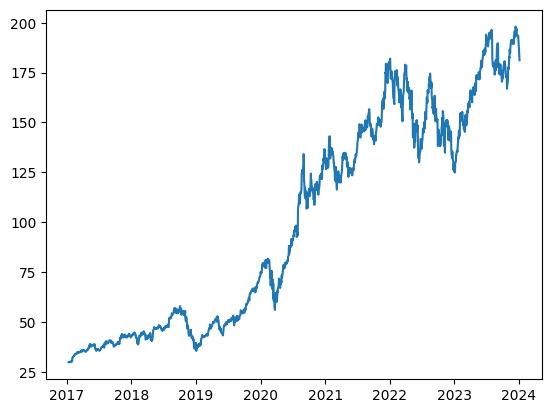

In [195]:
plt.plot(df["Close"])

In [196]:
df1=df["Close"]

In [197]:
df2=df1.reset_index()


In [198]:
df2.shape

(1758, 2)

In [199]:
df3=df2["Close"]

In [200]:
df3.shape

(1758,)

In [201]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df3=scaler.fit_transform(np.array(df3).reshape(-1, 1))

In [202]:
df3.shape

(1758, 1)

In [203]:
training_size=int(len(df3)*0.80)
test_size=len(df3)-training_size
train_data,test_data=df3[0:training_size,:],df3[training_size:len(df3),:1]


In [204]:
train_data.shape

(1406, 1)

In [205]:
test_data.shape

(352, 1)

In [206]:
import numpy as np

In [207]:
def prepare_data(dataset,time_stamp):
    dataX=[]
    dataY=[]
    for i in range(len(dataset)-time_stamp-1):
        a=dataset[i:(i+time_stamp),0]
        dataX.append(a)
        dataY.append(dataset[i+time_stamp,0])
    return np.array(dataX),np.array(dataY)

In [208]:
time_stamp=100
X_train,y_train=prepare_data(train_data,time_stamp)
X_test,y_test=prepare_data(test_data,time_stamp)

In [209]:
X_train.shape

(1305, 100)

In [210]:
X_train

array([[1.05434969e-03, 3.11848952e-04, 0.00000000e+00, ...,
        5.06979383e-02, 5.40688981e-02, 5.18116895e-02],
       [3.11848952e-04, 0.00000000e+00, 1.42560006e-03, ...,
        5.40688981e-02, 5.18116895e-02, 5.25838966e-02],
       [0.00000000e+00, 1.42560006e-03, 1.41074688e-03, ...,
        5.18116895e-02, 5.25838966e-02, 5.39500952e-02],
       ...,
       [7.44460920e-01, 7.71190946e-01, 7.77309145e-01, ...,
        8.10038636e-01, 8.08137790e-01, 8.05405438e-01],
       [7.71190946e-01, 7.77309145e-01, 7.97267569e-01, ...,
        8.08137790e-01, 8.05405438e-01, 8.02554170e-01],
       [7.77309145e-01, 7.97267569e-01, 8.05583631e-01, ...,
        8.05405438e-01, 8.02554170e-01, 8.02851189e-01]])

In [211]:
X_test.shape

(251, 100)

In [212]:
X_train.shape[0]

1305

In [213]:
X_train=X_train.reshape(X_train.shape[0] , X_train.shape[1] , 1)
X_test=X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

In [214]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (100,1)))

model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_22 (LSTM)              (None, 50)                20200     
                                                                 
 dense_15 (Dense)            (None, 25)                1275      
                                                                 
 dense_16 (Dense)            (None, 1)                 26        
                                                                 
Total params: 31901 (124.61 KB)
Trainable params: 31901 (124.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [215]:
model.fit(X_train, y_train, epochs=25,validation_data=(X_test,y_test), verbose=1)
test_predicted = model.predict(X_test)


Epoch 1/25
41/41 [==============================] - 3s 39ms/step - loss: 0.0353 - mean_absolute_error: 0.1110 - val_loss: 0.0035 - val_mean_absolute_error: 0.0536
Epoch 2/25
41/41 [==============================] - 1s 26ms/step - loss: 7.5564e-04 - mean_absolute_error: 0.0201 - val_loss: 9.9781e-04 - val_mean_absolute_error: 0.0271
Epoch 3/25
41/41 [==============================] - 1s 24ms/step - loss: 6.3215e-04 - mean_absolute_error: 0.0176 - val_loss: 0.0015 - val_mean_absolute_error: 0.0340
Epoch 4/25
41/41 [==============================] - 1s 26ms/step - loss: 5.8784e-04 - mean_absolute_error: 0.0169 - val_loss: 7.8465e-04 - val_mean_absolute_error: 0.0225
Epoch 5/25
41/41 [==============================] - 1s 26ms/step - loss: 5.8826e-04 - mean_absolute_error: 0.0168 - val_loss: 9.5164e-04 - val_mean_absolute_error: 0.0264
Epoch 6/25
41/41 [==============================] - 1s 23ms/step - loss: 5.8058e-04 - mean_absolute_error: 0.0166 - val_loss: 7.5359e-04 - val_mean_absolute_

In [216]:
test_inverse_predicted = scaler.inverse_transform(test_predicted)

In [217]:
test_inverse_predicted

array([[125.782906],
       [124.99832 ],
       [124.83675 ],
       [125.08008 ],
       [125.60063 ],
       [126.54538 ],
       [127.61343 ],
       [128.80443 ],
       [130.07335 ],
       [131.16618 ],
       [132.06009 ],
       [133.04668 ],
       [134.33406 ],
       [135.79324 ],
       [137.10464 ],
       [138.44019 ],
       [139.85522 ],
       [140.79991 ],
       [141.54657 ],
       [142.21457 ],
       [143.37888 ],
       [145.07646 ],
       [146.52759 ],
       [148.04712 ],
       [149.08337 ],
       [149.62569 ],
       [149.84535 ],
       [150.18164 ],
       [150.43001 ],
       [150.84966 ],
       [151.09737 ],
       [151.08984 ],
       [150.45825 ],
       [149.62523 ],
       [148.81364 ],
       [147.77077 ],
       [146.87311 ],
       [146.07841 ],
       [145.18289 ],
       [144.4173  ],
       [144.40535 ],
       [145.10692 ],
       [145.85458 ],
       [146.72641 ],
       [147.29991 ],
       [147.4215  ],
       [147.52933 ],
       [147.8

In [218]:
df1

Date
2017-01-11     29.937500
2017-01-12     29.812500
2017-01-13     29.760000
2017-01-17     30.000000
2017-01-18     29.997499
                 ...    
2023-12-29    192.529999
2024-01-02    185.639999
2024-01-03    184.250000
2024-01-04    181.910004
2024-01-05    181.179993
Name: Close, Length: 1758, dtype: float64

In [219]:
df1 .iloc[-98:,]

Date
2023-08-17    174.000000
2023-08-18    174.490005
2023-08-21    175.839996
2023-08-22    177.229996
2023-08-23    181.119995
                 ...    
2023-12-29    192.529999
2024-01-02    185.639999
2024-01-03    184.250000
2024-01-04    181.910004
2024-01-05    181.179993
Name: Close, Length: 98, dtype: float64

In [221]:

df4 = pd.concat([df1 .iloc[-251:].copy(),pd.DataFrame(test_inverse_predicted,columns=['Close_predicted'],index=df1 .iloc[-251:].index)], axis=1)

df4.head()

,Close,Close_predicted
Date,,
2023-01-06,129.619995,125.782906
2023-01-09,130.149994,124.998322
2023-01-10,130.729996,124.836746
2023-01-11,133.490005,125.080078
2023-01-12,133.410004,125.600632


<Axes: xlabel='Date'>

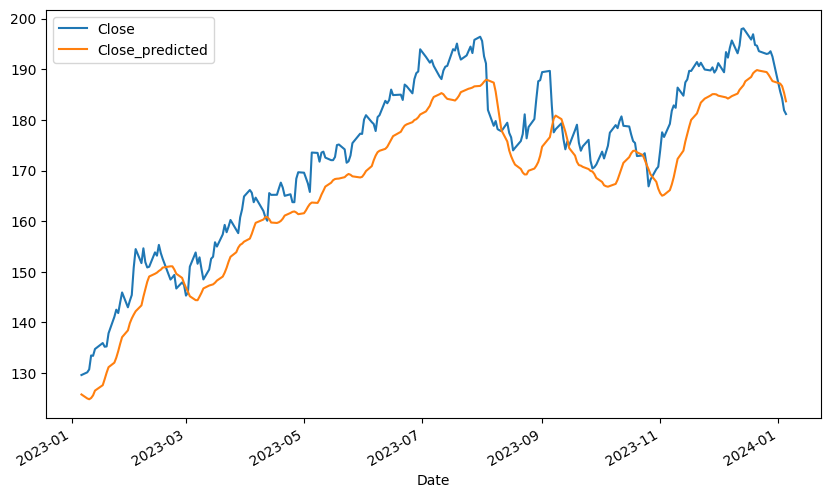

In [222]:
df4[['Close','Close_predicted']].plot(figsize=(10,6))

In [234]:
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape = (100,1)))



model.add(LSTM(20, return_sequences= False))


model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_27 (LSTM)              (None, 100, 20)           1760      
                                                                 
 lstm_28 (LSTM)              (None, 20)                3280      
                                                                 
 dense_19 (Dense)            (None, 1)                 21        
                                                                 
Total params: 5061 (19.77 KB)
Trainable params: 5061 (19.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [235]:
model.fit(X_train, y_train, epochs=100,validation_data=(X_test,y_test), verbose=1)
test_predicted = model.predict(X_test)

Epoch 1/100
41/41 [==============================] - 3s 35ms/step - loss: 0.0577 - mean_absolute_error: 0.1591 - val_loss: 0.0235 - val_mean_absolute_error: 0.1472
Epoch 2/100
41/41 [==============================] - 1s 24ms/step - loss: 0.0017 - mean_absolute_error: 0.0313 - val_loss: 0.0020 - val_mean_absolute_error: 0.0380
Epoch 3/100
41/41 [==============================] - 1s 24ms/step - loss: 9.6991e-04 - mean_absolute_error: 0.0230 - val_loss: 0.0023 - val_mean_absolute_error: 0.0399
Epoch 4/100
41/41 [==============================] - 1s 24ms/step - loss: 9.0055e-04 - mean_absolute_error: 0.0221 - val_loss: 0.0021 - val_mean_absolute_error: 0.0382
Epoch 5/100
41/41 [==============================] - 1s 23ms/step - loss: 8.6956e-04 - mean_absolute_error: 0.0216 - val_loss: 0.0018 - val_mean_absolute_error: 0.0354
Epoch 6/100
41/41 [==============================] - 1s 23ms/step - loss: 8.5397e-04 - mean_absolute_error: 0.0213 - val_loss: 0.0018 - val_mean_absolute_error: 0.0354


In [236]:
test_inverse_predicted = scaler.inverse_transform(test_predicted)

In [237]:
df5 = pd.concat([df1 .iloc[-251:].copy(),pd.DataFrame(test_inverse_predicted,columns=['Close_predicted'],index=df1 .iloc[-251:].index)], axis=1)

df5.head()

,Close,Close_predicted
Date,,
2023-01-06,129.619995,126.575706
2023-01-09,130.149994,125.671791
2023-01-10,130.729996,127.840637
2023-01-11,133.490005,129.649323
2023-01-12,133.410004,130.818665


<Axes: xlabel='Date'>

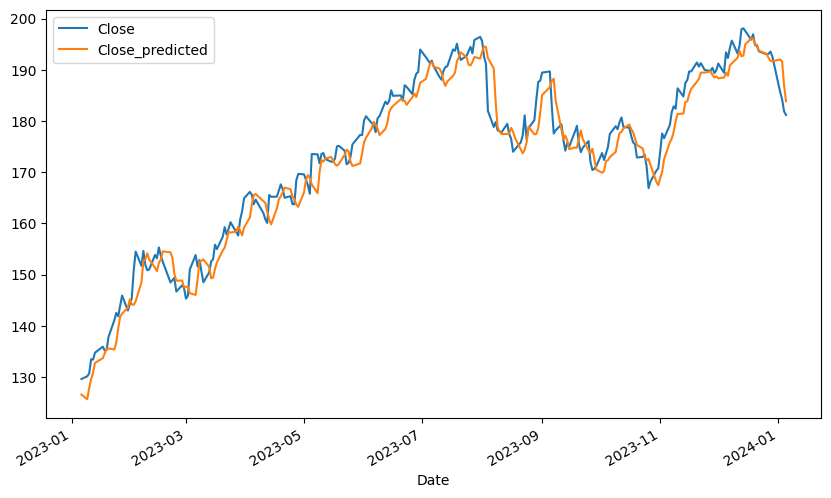

In [238]:
df5[['Close','Close_predicted']].plot(figsize=(10,6))

#### Trading in the stock market is growing rapidly and investors, analysts are eager to find a method and technique to effectively predict future stock market trends. In recent years, many studies have shown that LSTM neural network models are effective in predicting the stock market, and compared with other machine learning algorithms, LSTM neural network models perform very well when applied to longer prediction horizons.